In [1]:
!pip install tensorflow

In [2]:
# importing all the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense,Dropout


In [3]:
# loading the dataset
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [4]:
print("The shape of the X_train images =",X_train.shape)
print("The shape of the y_train images =",y_train.shape)
print("The shape of the X_test images =",X_test.shape)
print("The shape of the y_test images =",y_test.shape)

The shape of the X_train images = (50000, 32, 32, 3)
The shape of the y_train images = (50000, 1)
The shape of the X_test images = (10000, 32, 32, 3)
The shape of the y_test images = (10000, 1)


In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [7]:
# converting the 2d array into 1d array
# we don't need 2d array we just need the indexes. Reshaping it
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [8]:
print("After reshaping on y_train :",y_train)
print("After reshaping on y_test :",y_test)

After reshaping on y_train : [6 9 9 ... 9 1 1]
After reshaping on y_test : [3 8 8 ... 5 1 7]


In [9]:
# Assigning labels to the classes
# setting class names
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
classes[0]

'airplane'

In [10]:
# plotting the graph for a praticular image
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

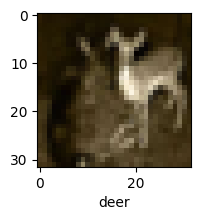

In [11]:
import random
idx = random.randint(0,len(X_train))
plot_sample(X_train,y_train,idx)

In [12]:
'''X_train[3] // shows the image at the train index
   y_train[3] // shows the image at the class of that index in the y_train
   classes[4]
'''


'X_train[3] // shows the image at the train index\n   y_train[3] // shows the image at the class of that index in the y_train\n   classes[4]\n'

## **Normalizing the Images**
*Image value ranges from 0-255,we divide each pixel value by 255 so that the pixel value will be in the range  0-1*

In [13]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [14]:
# Dividing each pixel value by 255
X_train = X_train /255.0
X_test = X_test /255.0

In [15]:
print("After normalizing X_train =",X_train[0])
print("After normalizing X_test =",X_test[0])
# values in the range of 0 and 1

After normalizing X_train = [[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.6784

# **ANN Model**

In [16]:
ann = Sequential([
      Flatten(input_shape=(32,32,3)),
      Dense(3000, activation='relu'),
      Dense(1000, activation='relu'),
      Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 15s 8ms/step - loss: 1.8126 - accuracy: 0.3529
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6257 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5406 - accuracy: 0.4579
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4830 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4309 - accuracy: 0.4975


# **Building a Covolutional Neural Network**

In [17]:
# Creating the model
model = Sequential()

In [18]:
# Adding first convolutional layer
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[32,32,3]))

In [19]:
# Adding second convolutional layer
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))

In [20]:
# adding first max pooling layer
model.add(MaxPool2D(pool_size=2,strides=2,padding="valid"))

In [21]:
# Adding third convolutional layer
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))

In [22]:
# Adding fourth convolutional layer
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))

In [23]:
# Adding second max pooling layer
model.add(MaxPool2D(pool_size=2,strides=2,padding="valid"))

In [24]:
# Flattening layer
model.add(Flatten())

In [25]:
# Droput Layer
model.add(Dropout(0.5,noise_shape=None,seed=None))

In [26]:
# Adding the first fully connected layer
model.add(Dense(units=128,activation='relu'))

In [27]:
# Output Layer
# softmax activation function for multi-class classification
model.add(Dense(units=10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

# **Compiling the model**

In [29]:
# we are dealing with multi-class classification that's why sparse_categorical_accuracy
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["sparse_categorical_accuracy"])

# **Training the model**

In [30]:
model.fit(X_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 13s 5ms/step - loss: 1.4418 - sparse_categorical_accuracy: 0.4769
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0447 - sparse_categorical_accuracy: 0.6264
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8751 - sparse_categorical_accuracy: 0.6914
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7832 - sparse_categorical_accuracy: 0.7235
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7139 - sparse_categorical_accuracy: 0.7483
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6645 - sparse_categorical_accuracy: 0.7653
Epoch 7/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6169 - sparse_categorical_accuracy: 0.7830
Epoch 8/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5783 - sparse_categorical_accuracy: 0.7941
Epoch 9/15
1563/1563 [=========

In [31]:
# Calculating the loss and testing accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6686 - sparse_categorical_accuracy: 0.7812


In [32]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7811999917030334


In [33]:
# predicting the output
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.0739024e-05, 3.3980116e-04, 8.7390414e-05, 5.0856292e-01,
        5.9794702e-06, 4.5883530e-01, 9.5231726e-04, 1.1896441e-05,
        3.1043040e-02, 1.5065304e-04],
       [2.3036459e-06, 1.2708926e-01, 2.1908832e-14, 1.6792127e-14,
        9.2438148e-17, 1.3013902e-17, 1.0540081e-14, 2.1895683e-17,
        8.7287670e-01, 3.1706069e-05],
       [1.7292729e-02, 1.5006357e-01, 2.5720973e-03, 4.1858302e-03,
        2.6430432e-03, 2.4179363e-04, 5.2597283e-05, 1.3330986e-04,
        7.6194489e-01, 6.0870171e-02],
       [7.8956211e-01, 1.4030516e-02, 7.5279997e-04, 2.2162977e-04,
        3.6337174e-04, 2.3024145e-06, 2.4084738e-05, 1.0381007e-05,
        1.9346884e-01, 1.5639383e-03],
       [5.3665715e-08, 6.0756556e-06, 8.7940041e-03, 1.0156493e-02,
        5.2594496e-03, 3.1454041e-05, 9.7573858e-01, 1.6951175e-08,
        1.3614660e-05, 1.7049302e-07]], dtype=float32)

In [34]:
# Predicted output probability index
# argmax returns the index of the highest value from the array
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [35]:
# Actual values
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [36]:
# Classification Report
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      1000
           1       0.89      0.90      0.89      1000
           2       0.72      0.64      0.68      1000
           3       0.60      0.63      0.61      1000
           4       0.73      0.74      0.73      1000
           5       0.72      0.68      0.70      1000
           6       0.83      0.84      0.83      1000
           7       0.85      0.82      0.84      1000
           8       0.84      0.90      0.87      1000
           9       0.85      0.86      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



880


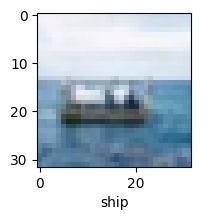

In [37]:
# Testing our model by randomly passing index
idx= random.randint(0,len(X_test))
print(idx)
plot_sample(X_test, y_test,idx)

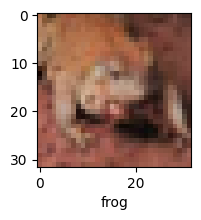

In [38]:
plot_sample(X_test, y_test,5)

In [39]:
classes[y_classes[5]]

'frog'